In [1]:
#############################
# Author: Wallace Abreu 
# Class: EEE387
# Professor: Edson Watanabe
#############################

import numpy as np
import matplotlib.pyplot as plt

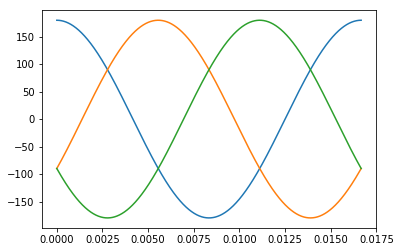

In [2]:
#Time domain three-phase source voltage
t = np.linspace(0, 1/60, 2400)
V_rms = 127
f = 60
w = 2 * np.pi * f
phi_1 = np.radians(0)
phi_2 = np.radians(-120)
phi_3 =  np.radians(-240)
V1_t = np.sqrt(2) * V_rms * np.cos(w * t + phi_1)
V2_t = np.sqrt(2) * V_rms * np.cos(w * t + phi_2)
V3_t = np.sqrt(2) * V_rms * np.cos(w * t + phi_3)

#Three-phase voltages plot\\n\
plt.plot(t, V1_t)
plt.plot(t, V2_t)
plt.plot(t, V3_t)

In [3]:

#Transmission line impedance\\n\
R = 0.04 #R=1 before scenario 2, R=0.4 before scenario 3\\n\
L = 1 * 1e-3
X_L = w * L
Z = R + 1j * X_L

#Three-phase complex source voltage\\n\
V1 = np.sqrt(2) * V_rms * (np.cos(phi_1) + 1j * np.sin(phi_1))
V2 = np.sqrt(2) * V_rms * (np.cos(phi_2) + 1j * np.sin(phi_2))
V3 = np.sqrt(2) * V_rms * (np.cos(phi_3) + 1j * np.sin(phi_3))
 
#power factor and V-I angle theta\\n\
fp = 0.8 
theta = np.arccos(fp)
  
#Devices' apparent and active power \\n\
P_tv = 120
P_lamp = 10
P_pc = 300
P_oven = 1200
P_shower = 5500
S_ac1 = 1300
P_ac1 = S_ac1 * np.cos(theta)
Q_ac1 = S_ac1 * np.sin(theta)
S_ac2 = 2200
P_ac2 = S_ac2 * np.cos(theta)
Q_ac2 = S_ac2 * np.sin(theta)

#Devices' impedances\\n\
Z_tv = V_rms**2 / P_tv
Z_lamp = V_rms**2 / P_lamp
Z_pc = V_rms**2 / P_pc
Z_oven = V_rms**2 / P_oven
Z_shower = V_rms**2 / P_shower
#AC's impedances\\n\
R_ac1 = V_rms**2 / P_ac1
R_ac2 = V_rms**2 / P_ac2
X_ac1 = V_rms**2 / Q_ac1
X_ac2 = V_rms**2 / Q_ac2
Z_ac1 = R_ac1 + 1j * X_ac1
Z_ac2 = R_ac2 + 1j * X_ac2

#Loads distribution to each line; parallel equivalent impedance\\n\
Za = 1 / (0 * 1/Z_tv + 0 * 1/Z_lamp + 1 * 1/Z_pc  + 1 * 1/(Z_ac2/4))
Zb = 1 / (0 * 1/Z_tv + 0 * 1/Z_lamp + 1 * 1/Z_pc + 1 * 1/Z_shower)
Zc = 1 / (2 * 1/Z_tv + 5 * 1/Z_lamp + 0 * 1/Z_pc + 1 * 1/Z_oven + 0 * 1/(Z_ac1/4))
 
#V = ZI matrix equation solving\\n\
Z_matrix = np.matrix([[2*Z + Za, Z, Z], [Z, 2*Z+ Zb, Z], [Z, Z, 2*Z + Zc]])
V_vector = np.matrix([[V1], [V2], [V3]])
I_matrix = np.linalg.inv(Z_matrix) * V_vector

I1 = I_matrix[0,0]
I2 = I_matrix[1,0]
I3 = I_matrix[2,0]

#Neutral line current\\n\
in_rec = I1 + I2 + I3
in_phasor = np.array([np.abs(in_rec), np.angle(in_rec)])

#Phases and neutral voltages in rectangular and phasor modes\\n\
V_a0_rec = I1 * Za 
V_a0_phasor = np.array([np.abs(V_a0_rec) / np.sqrt(2), np.degrees(np.angle(V_a0_rec))])

V_b0_rec = I2 * Zb 
V_b0_phasor = np.array([np.abs(V_b0_rec) / np.sqrt(2), np.degrees(np.angle(V_b0_rec))])

V_c0_rec = I3 * Zc 
V_c0_phasor = np.array([np.abs(V_c0_rec) / np.sqrt(2), np.degrees(np.angle(V_c0_rec))])

V_n0_rec = -in_rec * Z 
V_n0_phasor = np.array([np.abs(V_n0_rec) / np.sqrt(2), np.degrees(np.angle(V_n0_rec))])

#Symmetrical components \\n\
a = np.exp(1j * 2*np.pi / 3)
sequence_matrix = np.matrix([[1, a, a**2], [1, a**2, a], [1, 1, 1]])
voltage_vector = np.matrix([[V_a0_rec], [V_b0_rec], [V_c0_rec]])
sequence_voltages = 1/3 * sequence_matrix * voltage_vector
sequence_voltages = sequence_voltages.flatten()